In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

In [12]:
churn=pd.read_csv("Churn_Modelling.csv")
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
churn=churn.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [24]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# null values 

In [8]:
churn.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [16]:
churn.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# corr

In [10]:
churn.shape

(10000, 14)

In [19]:
#rate cal
rate=churn.Exited.value_counts()/10000
rate

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [89]:
rate2=churn.Tenure.value_counts()/10000*100
rate2


2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: Tenure, dtype: float64

In [104]:
#churn.groupby("Geography").size()
rate=churn.Age.value_counts()/10000*100
rate
churn.Age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [90]:
rate=churn.HasCrCard.value_counts()/10000*100

rate

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

In [93]:
rate=churn.NumOfProducts.value_counts()/10000 *100
rate

1    50.84
2    45.90
3     2.66
4     0.60
Name: NumOfProducts, dtype: float64

In [94]:
rate=churn.IsActiveMember.value_counts()/10000*100
rate

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

In [82]:
#rate=churn.CreditScore.value_counts()/10000
#rate

In [14]:
churn.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [20]:
EX_Summary = churn.groupby('Exited')
EX_Summary.mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


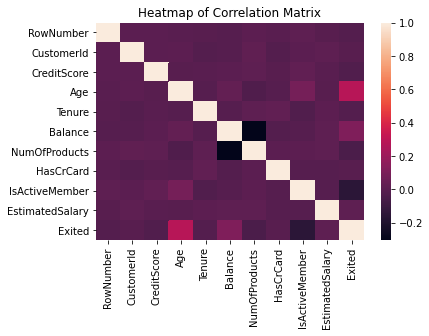

In [21]:
#Correlation Matrix
corr = churn.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

# eda

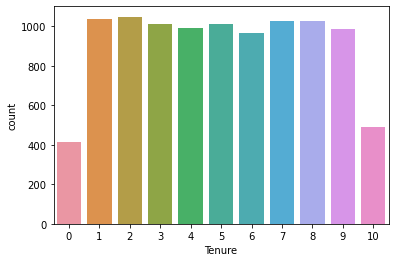

In [25]:
sns.countplot(x="Tenure",data=churn)

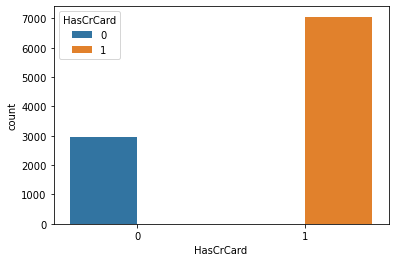

In [71]:
sns.countplot(x="HasCrCard",hue="HasCrCard",data=churn)

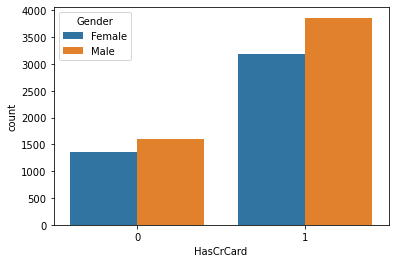

In [16]:
sns.countplot(x="HasCrCard",hue="Gender",data=churn)

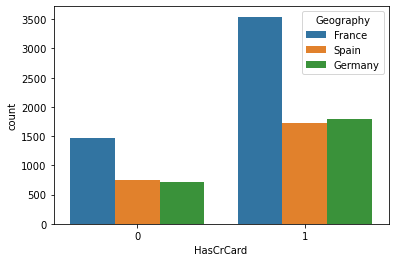

In [17]:
sns.countplot(x="HasCrCard",hue="Geography",data=churn)

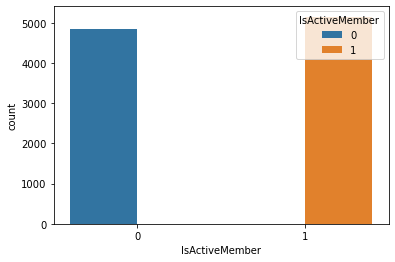

In [70]:
sns.countplot(x="IsActiveMember",hue="IsActiveMember",data=churn)

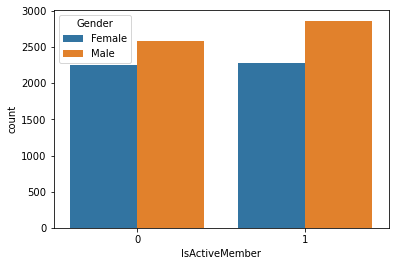

In [18]:
sns.countplot(x="IsActiveMember",hue="Gender",data=churn)

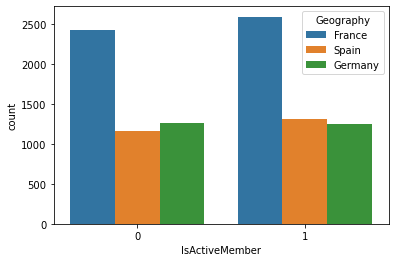

In [19]:
sns.countplot(x="IsActiveMember",hue="Geography",data=churn)

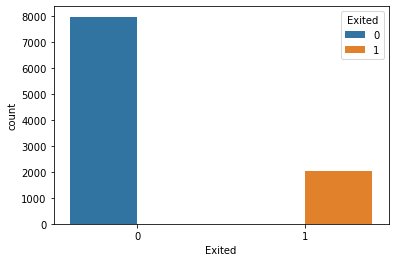

In [69]:
sns.countplot(x="Exited",hue="Exited",data=churn)

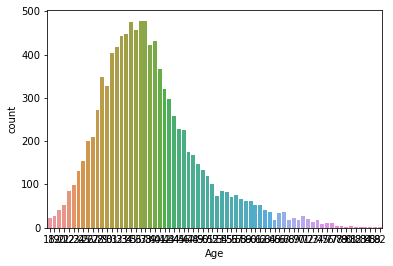

In [68]:
sns.countplot(x="Age",data=churn)

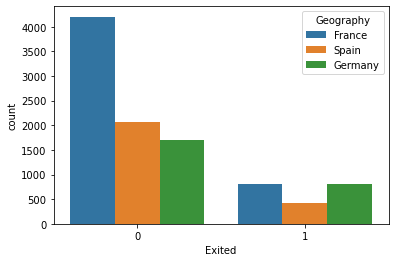

In [28]:
sns.countplot(x="Exited",hue="Geography",data=churn)

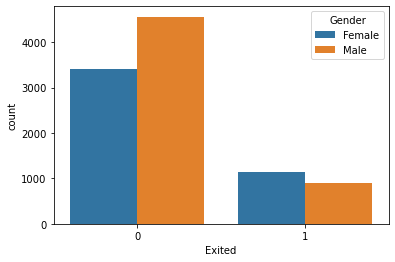

In [29]:
sns.countplot(x="Exited",hue="Gender",data=churn)

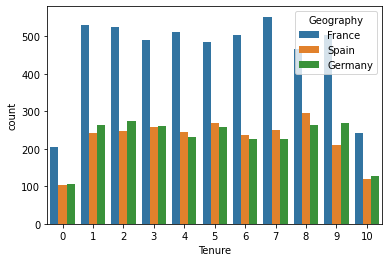

In [30]:
sns.countplot(x="Tenure",hue="Geography",data=churn)

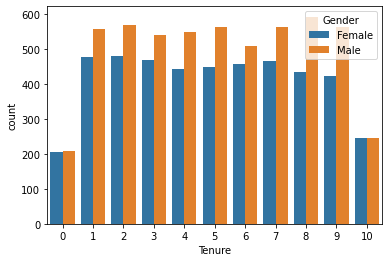

In [31]:
sns.countplot(x="Tenure",hue="Gender",data=churn)

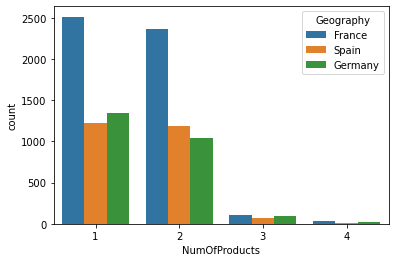

In [32]:
sns.countplot(x="NumOfProducts",hue="Geography",data=churn)

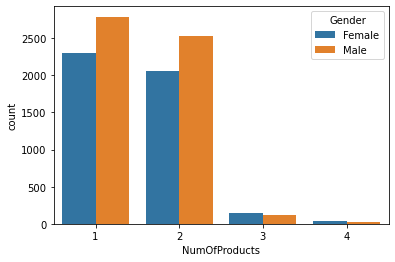

In [34]:
sns.countplot(x="NumOfProducts",hue="Gender",data=churn)

# histogram

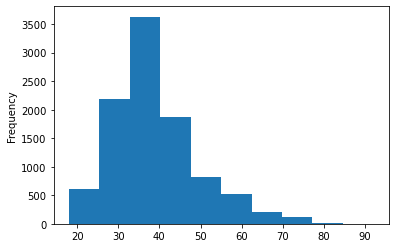

In [36]:
churn["Age"].plot.hist()

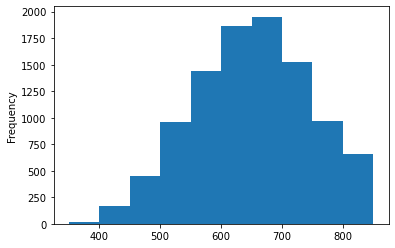

In [37]:
churn["CreditScore"].plot.hist()

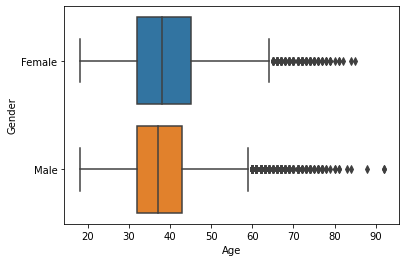

In [22]:
sns.boxplot(x="Age",y="Gender",data=churn)

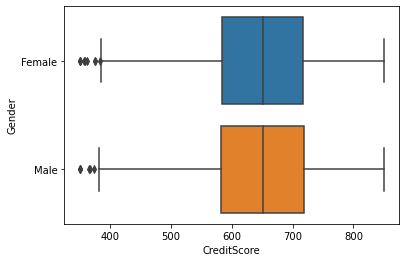

In [20]:
sns.boxplot(x="CreditScore",y="Gender",data=churn)

In [72]:
#sns.boxplot(x="CreditScore",y="Exited",data=churn)

# data wragling

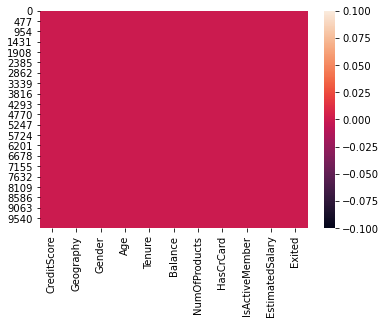

In [38]:
#heatmap
sns.heatmap(churn.isnull())

In [40]:
#str to factor
Geography=pd.get_dummies(churn["Geography"])#drop_first=True)
Geography.head()


,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [39]:
Gender=pd.get_dummies(churn["Gender"])#drop_first=True)
Gender.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [35]:
churn=churn.drop(["France","Germany","Spain","Female","Male"],axis=1)
churn.head()

In [41]:
#pd.get_dummies(hr[""])
churn=pd.concat([churn,Geography,Gender],axis=1)
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [43]:
churn=churn.drop(["Spain","Gender","Geography"],axis=1)


In [44]:
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0


# train and test

In [45]:
from sklearn.preprocessing import StandardScaler


In [46]:
x=churn.drop("Exited",axis=1)
y=churn["Exited"]

In [47]:
#plt.scatter(x,y,c=y,cmap='rainbow')
#plt.title("scatter plot of logistic regression")
#plt.show()

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.3)

In [49]:
logchurn=LogisticRegression()

In [50]:
logchurn.fit(X_train,Y_train)

LogisticRegression()

In [51]:
predictions=logchurn.predict(X_test)


In [52]:
classification_report(Y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.98      0.88      2377\n           1       0.44      0.06      0.10       623\n\n    accuracy                           0.79      3000\n   macro avg       0.62      0.52      0.49      3000\nweighted avg       0.72      0.79      0.72      3000\n'

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(Y_test,predictions)

array([[2333,   44],
       [ 588,   35]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(Y_test,predictions)

0.7893333333333333

In [57]:
logchurn.coef_

array([[-5.06494265e-03,  4.28227831e-02, -1.36118626e-03,
         3.60844376e-06, -5.14206655e-04, -2.11598573e-04,
        -1.34256796e-03, -9.38579677e-07, -8.06367787e-04,
         9.35762396e-04,  8.07329900e-04, -9.72982622e-04]])

In [58]:
logchurn.intercept_

array([-0.00016565])

# scalling data accuracy increases

In [59]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [62]:
y_pred=classifier.predict(X_test)

In [63]:
accuracy_score(Y_test,y_pred)

0.813

In [64]:
logchurn.coef_

array([[-5.06494265e-03,  4.28227831e-02, -1.36118626e-03,
         3.60844376e-06, -5.14206655e-04, -2.11598573e-04,
        -1.34256796e-03, -9.38579677e-07, -8.06367787e-04,
         9.35762396e-04,  8.07329900e-04, -9.72982622e-04]])

In [65]:
logchurn.intercept_

array([-0.00016565])